In [1]:
import os
import sys
import json
import datetime

import pandas as pd
import numpy as np

In [2]:
cwd = os.getcwd()
join = os.path.join
norm = os.path.normpath

In [3]:
sys.path.append(norm(join(cwd, '..', '..', '..', 'glhe')))

In [4]:
from standalone.plant_loop import PlantLoop
import glhe

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 9]
plt.rcParams['font.size'] = 14

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [7]:
data_path = norm(join(cwd, '..', '..', 'validation', 'MFRTRT', 'MFRTRT_loads.csv'))
df_raw_data = pd.read_csv(data_path, parse_dates=True, index_col='Date/Time')

In [8]:
df_sim_input_data = df_raw_data[['Inst. HT [1] [W]', 'mdot [kg/s]', 'Outlet 1 [C]', 'Inlet 1 [C]']].copy(deep=True)
df_sim_input_data.rename(columns = {'Inst. HT [1] [W]': 'Exp. HT Rate [W]', 
                                    'Outlet 1 [C]': 'Exp. Inlet [C]', 
                                    'Inlet 1 [C]': 'Exp. Outlet [C]'}, inplace=True)
# df_sim_input_data.to_csv(join(cwd, 'input_data.csv'))

In [9]:
df_sim_input_data['time'] = pd.to_timedelta(df_sim_input_data.index)
df_sim_input_data['time'] = datetime.datetime(year=2019, month=1, day=1, hour=0, minute=0) + (df_sim_input_data['time'] - df_sim_input_data['time'][0])
df_sim_input_data.set_index('time', inplace=True)
df_sim_input_data.index.rename('Date/Time', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing datetime64-dtype data to TimedeltaIndex is deprecated, will raise a TypeError in a future version
  """Entry point for launching an IPython kernel.


In [10]:
d = glhe.globals.functions.load_json('MFRTRT_LTS_input.json')
# d['ground-heat-exchanger'][0]['g-function-path'] = norm(join(cwd, 'g.csv'))
# d['ground-heat-exchanger'][0]['g_b-function-path'] = norm(join(cwd, 'g_b_exp.csv'))
d['temperature-profile'][0]['path'] = norm(join(cwd, 'input_data.csv'))
d['flow-profile'][0]['path'] = norm(join(cwd, 'input_data.csv'))
d['simulation']['time-step'] = 30
d['simulation']['runtime'] = 3600 * 50

In [11]:
with open(join(cwd, 'in.json'), 'w') as f:
    f.write(json.dumps(d, sort_keys=True, indent=2, separators=(',', ': ')))

In [12]:
PlantLoop('in.json').simulate()

Simulation time: 0:00:42.034031


True

In [13]:
df = pd.read_csv('out.csv', index_col=0, parse_dates=True)

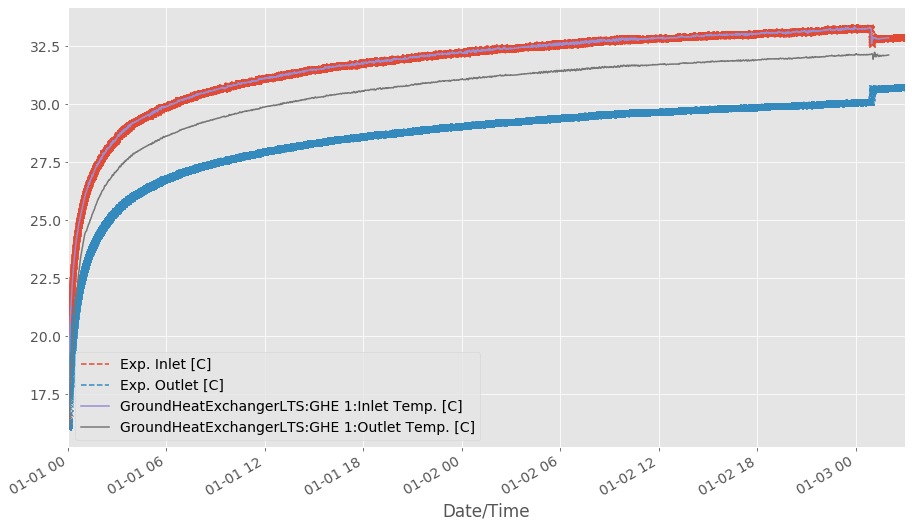

In [14]:
start_time = '2019-01-01 00:00:00'
end_time = '2019-01-03 3:00:00'

ax = df_sim_input_data[['Exp. Inlet [C]', 'Exp. Outlet [C]']].loc[start_time:end_time].plot(style='x--')
df[['GroundHeatExchangerLTS:GHE 1:Inlet Temp. [C]',
    'GroundHeatExchangerLTS:GHE 1:Outlet Temp. [C]']].loc[start_time:end_time].plot(ax=ax)

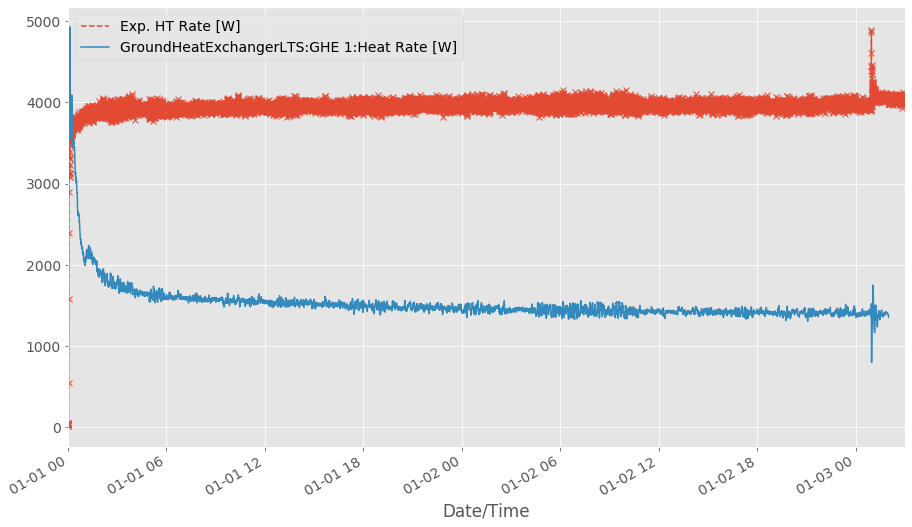

In [15]:
ax = df_sim_input_data[['Exp. HT Rate [W]']].loc[start_time:end_time].plot(style='x--')
df[['GroundHeatExchangerLTS:GHE 1:Heat Rate [W]']].loc[start_time:end_time].plot(ax=ax)

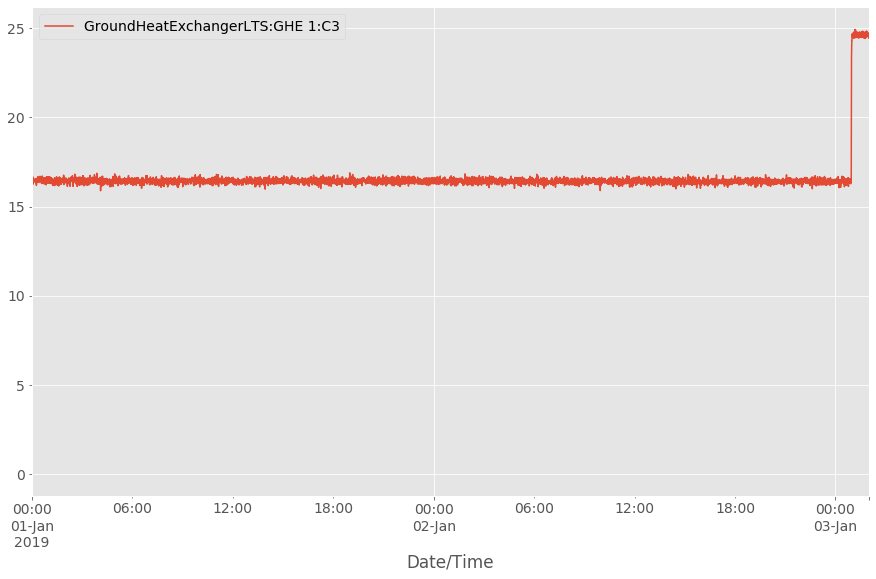

In [19]:
df[['GroundHeatExchangerLTS:GHE 1:C3']].loc[start_time:end_time].plot()